# P3 : Partie traitement des données

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cm as cm
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
# Lieu où se trouve le fichier
_FICHIER = 'C:\\Users\\Toni\\Desktop\\pas_synchro\\p3_bdd_clean_v2.csv'
_DOSSIERTRAVAIL = 'C:\\Users\\Toni\\python\\python\\Projet_3\\images'

# Fonctions secondaires

In [4]:
def dbscan(X, sp):
    """
    TBD
    """

    X = StandardScaler().fit_transform(X)

    # Compute DBSCAN
    db = DBSCAN(eps=0.8, min_samples=sp).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    mask = (labels == -1)
    reste = -sum(labels[mask])

    print('N =', sp)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Nombre sans clusters : %d' % reste)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

    return n_clusters_

In [5]:
def illustration(data, range_n_clusters):
    """
    TBD
    """

    # Scale des données obligatoire avant la réduction des dimensions
    std_scale = preprocessing.StandardScaler().fit(data)
    X = std_scale.transform(data)

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(36, 14)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

In [6]:
def count_word(data, ref_col, liste):
    """
    TBD
    """
    keyword_count = dict()

    for word in liste:
        keyword_count[word] = 0

    for liste_keywords in data[ref_col].str.split('|'):
        if isinstance(liste_keywords, float) and pd.isnull(liste_keywords):
            continue
        for word in [word for word in liste_keywords if word in liste]:
            if pd.notnull(word):
                keyword_count[word] = keyword_count[word] + 1

    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []

    for k, v in keyword_count.items():
        keyword_occurences.append([k, v])

    keyword_occurences.sort(key=lambda x: x[1], reverse=True)

    return keyword_occurences, keyword_count

In [7]:
def comptabiliser(data, valeur_cherchee):
    """
    TBD
    """
    # compter tous les genres différents
    listing = set()

    for word in data[valeur_cherchee].str.split('|').values:
        if isinstance(word, float):
            continue
        listing = listing.union(word)

    # compter le nombre d'occurence de ces genres
    listing_compte, dum = count_word(data, valeur_cherchee, listing)

    return listing_compte

In [8]:
def affichage_kmeans(datanum, vmin, vmax, step):
    """
    TBD
    """

    listing = dict()
    distortions = []

    # Scale des données obligatoire avant la réduction des dimensions
    std_scale = preprocessing.StandardScaler().fit(datanum)
    X_scaled = std_scale.transform(datanum)

    # Réduction t-Sne
    #print("Computing t-SNE embedding")
    #tsne = manifold.TSNE(n_components=2, perplexity=50, n_iter=500)

    cluster_range = range(vmin, vmax+1, step)

    for i in cluster_range:

        # On fait i clusters avec les données scalées.
        kmeans = KMeans(n_clusters=i, random_state=10)

        kmeans.fit(X_scaled)
        # Nouvelle colonne avec les conclusions de kmeans
        datanum['labels'] = kmeans.labels_

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        cluster_labels = kmeans.fit_predict(X_scaled)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print("For n_clusters =", i,
              "The average silhouette_score is :", silhouette_avg)

        distortions.append(kmeans.inertia_)
        listing[i] = silhouette_avg

    # Données du graphique du coude
    clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": distortions})
    print(clusters_df)

    # Graphique du coude
    plt.figure(figsize=(15, 15))
    plt.plot(cluster_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    fichier_save = _DOSSIERTRAVAIL + '\\' + 'coude'
    plt.savefig(fichier_save, dpi=100)
    plt.show()

    return listing, clusters_df

Transformation d'un dataset traditionel en dataset strictement numérique

In [9]:
def transpose_bool(data, colon, limite):
    """
    TBD
    """

    # On supprime les #NA
    data[colon].fillna('vide', inplace=True)

    # énumaration des genres
    listing = comptabiliser(data, colon)

    p = 0

    for mot, compte in listing:
        if p < limite:
            data[mot] = pd.Series(((1 if mot in data[colon][i] else 0) for i in range(len(data[colon]))), index=data.index)
        else:
            return p
        p = p+1

    return p

In [10]:
def histogramme(data, colon):
    """
    TBD
    """

    fichier_save = _DOSSIERTRAVAIL + '\\' + 'histogram_' + colon

    #steps = (max(data[colon])-min(data[colon]))/100
    #bin_values = np.arange(start=min(data[colon]), stop=max(data[colon]), step=steps)
    plt.figure(figsize=(10, 6))
    plt.xlabel('Valeurs')
    plt.ylabel('Décompte')
    titre = 'Histogramme ' + colon
    plt.title(titre)

    # Affichage sans les valeurs NaN
    plt.hist(data[colon][np.isfinite(data[colon])], bins=100)
    # Avec : # plt.hist(data[colon], bins=bin_values)
    plt.savefig(fichier_save, dpi=100)
    plt.show()

In [11]:
def recommandation(datanum, data, id_film):
    """
    TBD
    """
    #
    if isinstance(id_film, int):
        
        # Recherche des données du film
        data_film = datanum.loc[id_film].values.reshape(1, -1)
        
        # Quel est le titre recherché
        titre = data['movie_title'].loc[id_film]
        titre_fin = titre
        print('Titre retenu : ', titre)
    else:
        
        # Rajout des noms des films
        datanum['movie_title'] = data['movie_title']

        # Recherche des données du film
        data_film = datanum.loc[datanum['movie_title'].str.contains(id_film)]

        # Quel est le titre recherché
        mask = datanum['movie_title'].str.contains(id_film)
        titre = data['movie_title'][mask]
        titre_fin = str(titre.values[-1:])
        print('Titre retenu : ', titre.values[-1:])

        # Suppression de la colonne non-chifrée
        del data_film['movie_title']
        del datanum['movie_title']

    data_film = np.array(data_film)

    if data_film.size > 0:

        # configuration du knn
        neigh = NearestNeighbors(n_neighbors=20, algorithm='auto', metric='euclidean')

        # knn
        neigh.fit(datanum)
        indices = neigh.kneighbors(data_film)

        indice_supp = []

        # Récupération des index des films de même série
        for i in indices[1][-1]:
            if ((str(data.loc[i]['movie_title']) in titre_fin)):
                indice_supp.append(i)
            elif (titre_fin in (str(data.loc[i]['movie_title']))):
                indice_supp.append(i)

        # Création du nouveau dataset avec les données (indices) récupérées du knn
        for i in indices[1]:
            second_df = data.loc[i] 
        
        # Suppression des films de la même série
        for i in indice_supp:
            second_df = second_df.drop([i])
        
        # Création du second dataset pour tester la popularité
        liste_criteres = ['movie_title',
                          'cast_total_facebook_likes',
                          'imdb_score',
                          'movie_facebook_likes']

        # Suppresion des colonnes qui ne nous intéressent pas pour le critère de popularité du second dataset
        for colon in second_df:
            if colon not in liste_criteres:
                del second_df[colon]

        # On enlève les Nan
        second_df.fillna(0, inplace=True)

        # Tester la popularité
        pop(second_df, data, datanum, id_film)

    else:
        print("Le film recherché n'existe pas.")

Calcul d'un score de popularité simpliste, avec une vérification si nécessaire

In [12]:
def pop(second_df, data, datanum, id_film):
    """
    TBD
    """

    # Indice de popularité simpliste
    min_max_scaler = preprocessing.MinMaxScaler()
    second_df[['cast_total_facebook_likes',
               'imdb_score',
               'movie_facebook_likes']] = min_max_scaler.fit_transform(second_df[['cast_total_facebook_likes', 'imdb_score', 'movie_facebook_likes']])
    
    second_df['score'] = second_df['cast_total_facebook_likes'] + second_df['imdb_score'] + second_df['movie_facebook_likes']

    # Score du film
    score = sum(second_df.score[second_df.movie_title == id_film])

    # Calcul de la valeur absolue du score pour voir la différence avec les autres films
    second_df['score'] = abs(second_df['score']-score)
    second_df = second_df.sort_values(by='score', ascending=True)
    
    # 5 résultats les plus proches sans prendre le film lui-même qui est en case 0
    res = second_df['movie_title'][1:6]

    # Résultats
    print(res)

#    # Petite vérification des mot-clefs associés
#    for i in range(len(res)):
#        print(data.loc[res.index[i]]['movie_title'])
#        for j in datanum:
#            if datanum.loc[res.index[i]][j] == 1:
#                print(j)
#        print()

# Fonction principale

In [14]:
# On charge le dataset
data = pd.read_csv(_FICHIER, encoding="ISO-8859-1")

# Suppression de la colonne inutile
del data['Unnamed: 0']

# Suppression des espaces en fin de chaine de caractères
data['movie_title'] = data['movie_title'].replace({'\xa0': ''}, regex=True)
data['movie_title'] = data['movie_title'].str.strip()

In [15]:
datanum = data.copy()
datanum.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4870.000000,4904.000000,4817.000000,4896.000000,4912.000000,4.919000e+03,4.919000e+03,4919.000000,4906.000000,4898.000000,4.434000e+03,4813.000000,4906.000000,4919.000000,4593.000000,4919.000000
mean,138.010267,107.089111,690.705418,630.961397,6490.875814,4.363525e+07,8.261820e+04,9574.645863,1.376478,267.603512,3.928822e+07,2002.445045,1621.071545,6.437874,2.222105,7345.293556
std,120.253857,25.278583,2832.107042,1625.428769,15103.081835,6.204814e+07,1.382858e+05,18159.992290,2.023493,372.839155,2.085579e+08,12.453460,4010.222585,1.127606,1.402514,19200.708189
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,8.050985e+06,8.356500e+03,1394.000000,0.000000,64.000000,6.000000e+06,1999.000000,277.000000,5.800000,1.850000,0.000000
50%,108.000000,103.000000,48.000000,365.500000,982.000000,2.160712e+07,3.315800e+04,3044.000000,1.000000,153.500000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,160.000000
75%,191.000000,118.000000,190.000000,633.000000,11000.000000,5.205624e+07,9.375750e+04,13611.500000,2.000000,320.000000,4.300000e+07,2011.000000,912.000000,7.200000,2.350000,2000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [16]:
# Données manquantes
missing_data = datanum.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data['filling_factor'] = (datanum.shape[0]-missing_data['missing_count'])/datanum.shape[0]*100
missing_data.sort_values('filling_factor').reset_index(drop=True)

,column_name,missing_count,filling_factor
0,budget,485,90.140272
1,aspect_ratio,326,93.372637
2,content_rating,301,93.880870
3,plot_keywords,152,96.909941
4,title_year,106,97.845090
5,director_facebook_likes,102,97.926408
6,director_name,102,97.926408
7,num_critic_for_reviews,49,99.003863
8,actor_3_facebook_likes,23,99.532425
9,actor_3_name,23,99.532425


In [17]:
# Transposition en 0 et 1 des valeurs non-numériques
liste_criteres = ['genres',
                  'plot_keywords',
                  'content_rating',
                  'director_name',
                  'actor_1_name',
                  'actor_2_name',
                  'actor_3_name']

for critere in liste_criteres:
    num = transpose_bool(datanum, critere, 50)
    print("Nombre : ", num, "\t", critere)

Nombre :  26 	 genres
Nombre :  50 	 plot_keywords
Nombre :  7 	 content_rating
Nombre :  50 	 director_name
Nombre :  50 	 actor_1_name
Nombre :  50 	 actor_2_name
Nombre :  50 	 actor_3_name


In [18]:
# Suprresion de ce qui n'est pas chiffré
datanum = datanum.drop(['color', 'director_name', 'actor_1_name', 'genres', 'movie_title', 'actor_2_name', 'actor_3_name'], axis=1)
datanum = datanum.drop(['plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating'], axis=1)

# Suprresion de ce qui n'est pas chiffré #2
datanum = datanum.drop(['num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes'], axis=1)
datanum = datanum.drop(['num_user_for_reviews', 'actor_1_facebook_likes', 'actor_2_facebook_likes'], axis=1)
datanum = datanum.drop(['aspect_ratio', 'num_voted_users', 'cast_total_facebook_likes'], axis=1)
datanum = datanum.drop(['title_year', 'gross', 'duration', 'budget', 'imdb_score', 'movie_facebook_likes', 'facenumber_in_poster'], axis=1)

In [19]:
datanum.fillna(0, inplace=True)

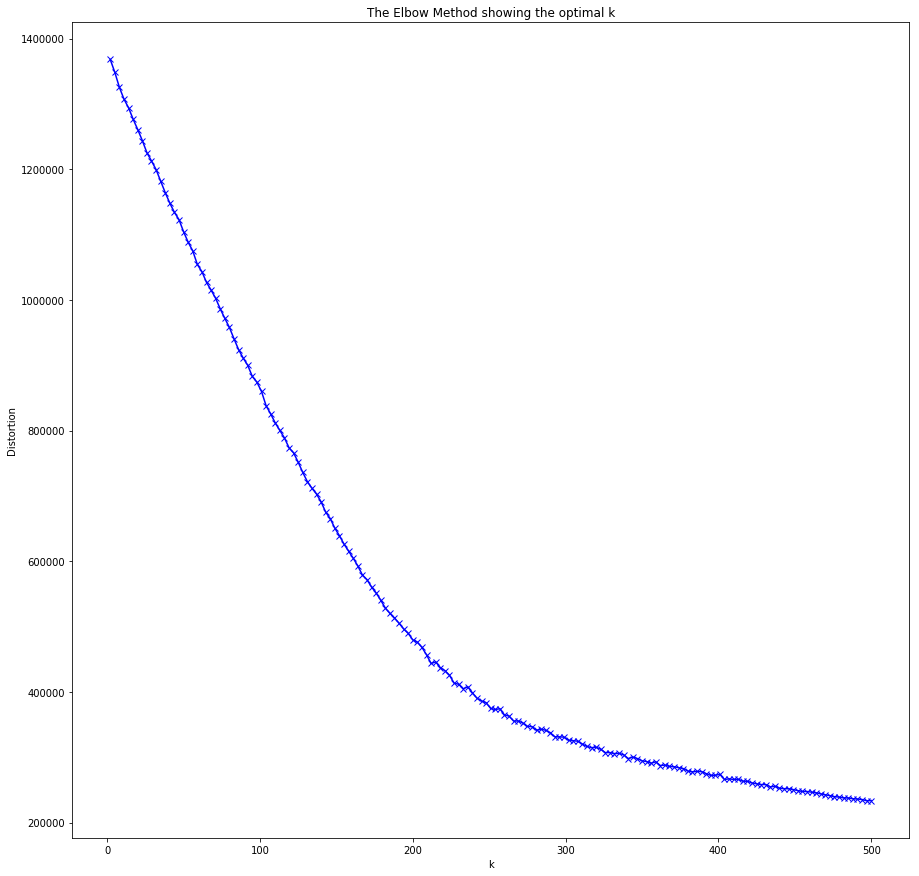

In [11]:
# Coude
res, dico = affichage_kmeans(datanum, 2, 500, 3)

For n_clusters = 250 The average silhouette_score is : 0.193141924644


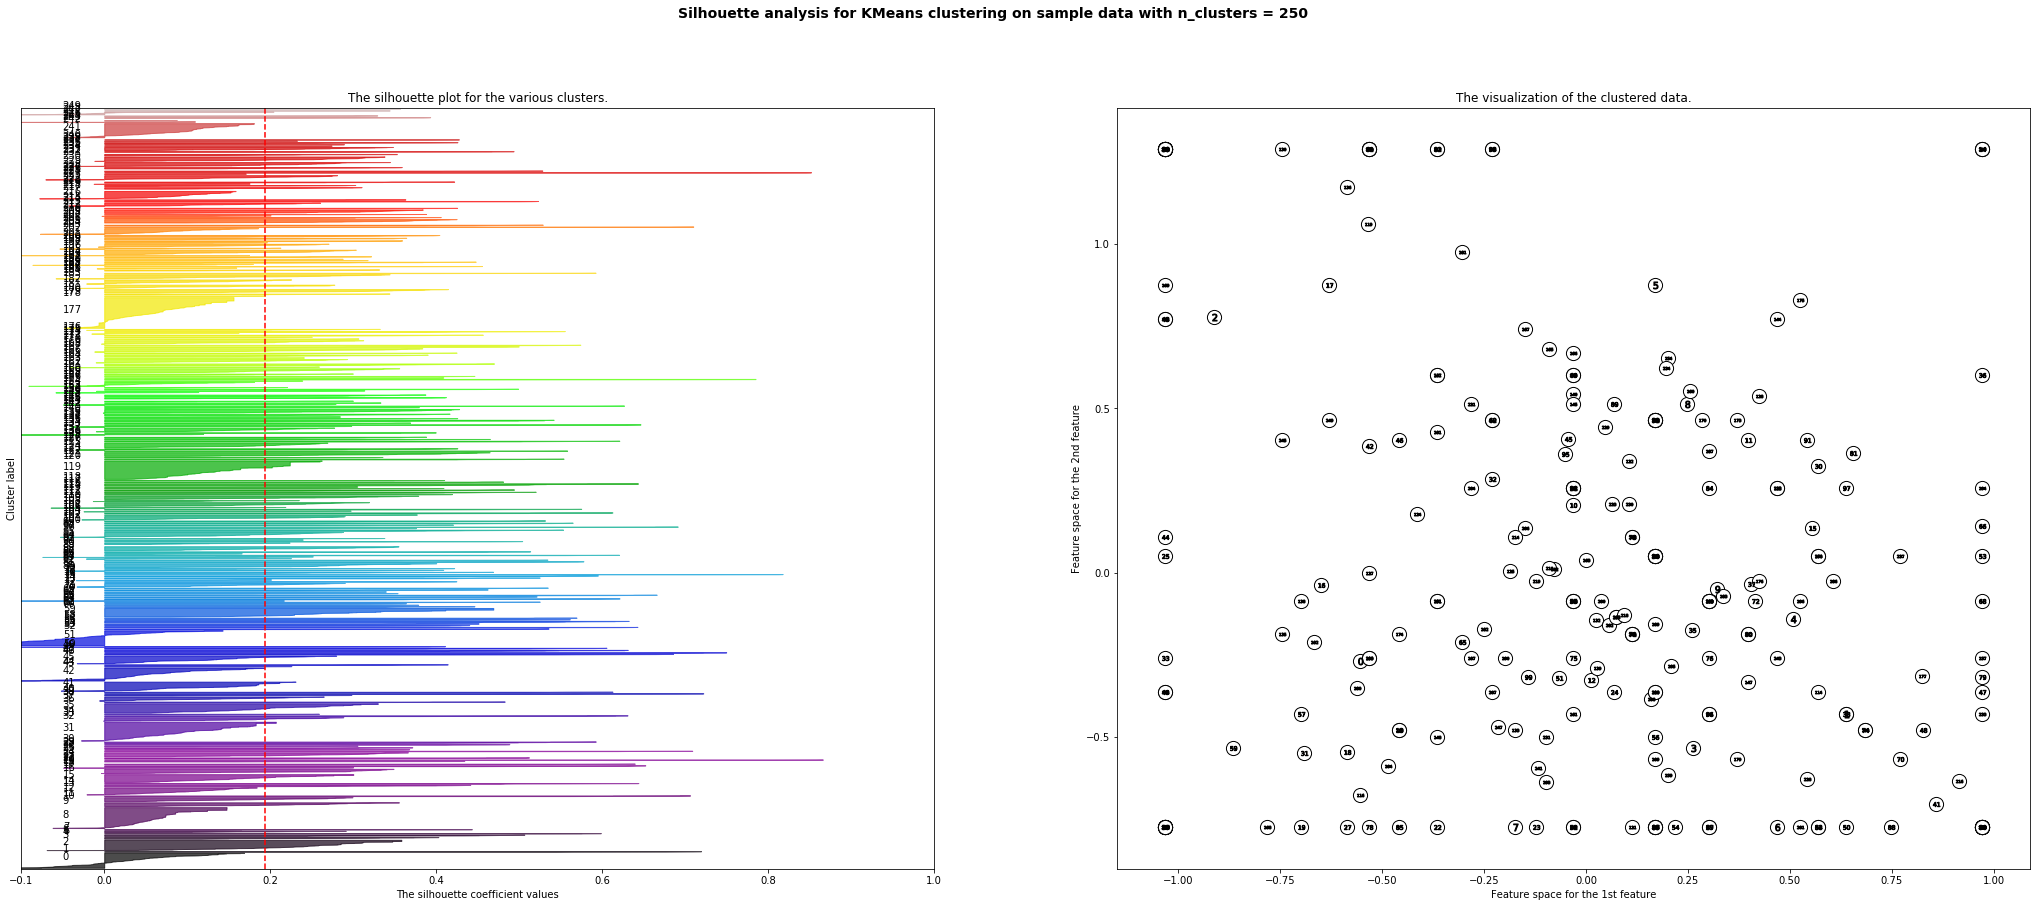

For n_clusters = 255 The average silhouette_score is : 0.195615771507


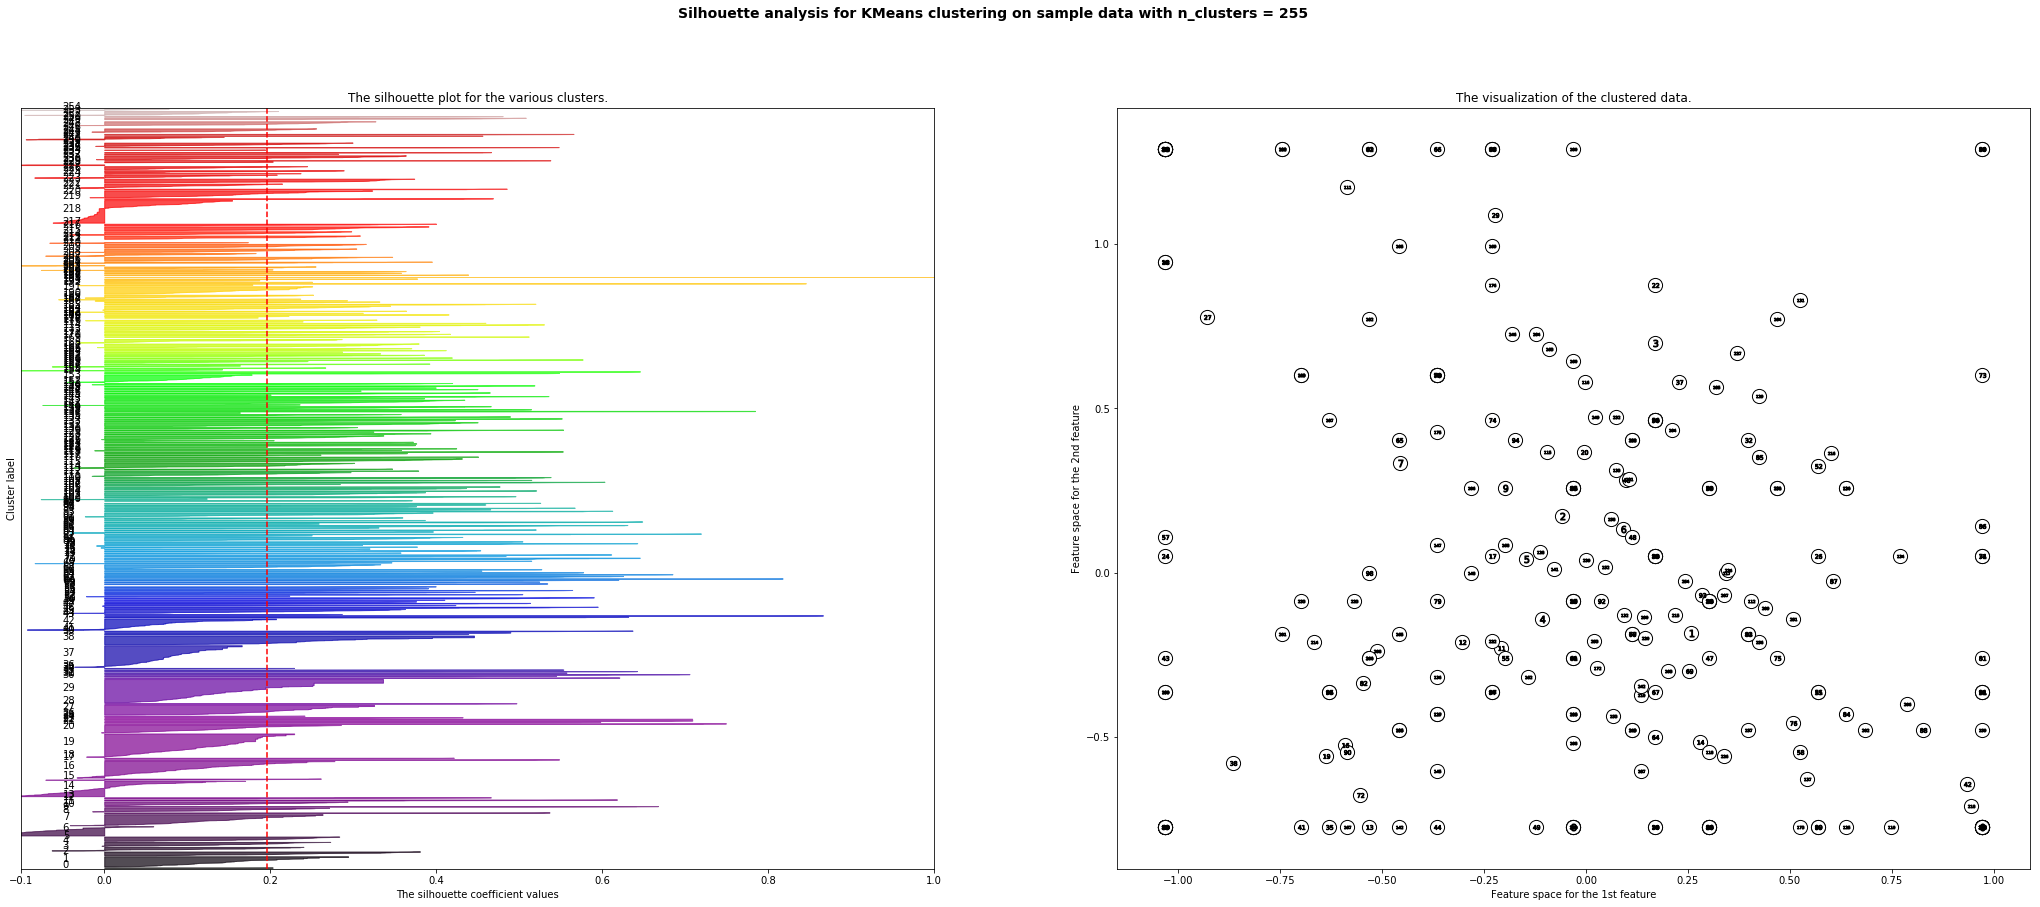

In [19]:
# C'est moche
illustration(datanum, range(250, 260, 5))

In [13]:
# Un seul KMeans pour voir la répartition des labels en fonction d'un n_clusters défini
std_scale = preprocessing.StandardScaler().fit(datanum)
X_scaled = std_scale.transform(datanum)
kmeans = KMeans(n_clusters=160, random_state=10)
kmeans.fit(X_scaled)

# Nouvelle colonne avec les conclusions de kmeans
datanum['labels'] = kmeans.labels_

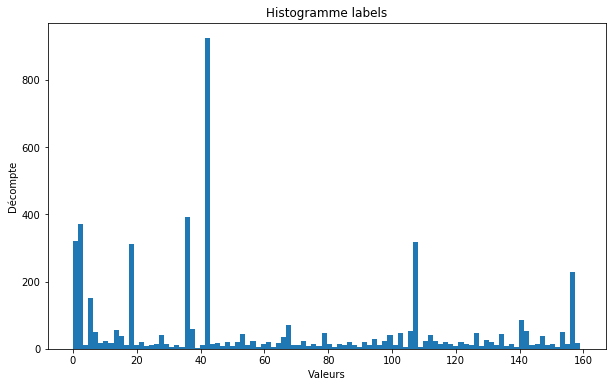

In [17]:
# Répartition des labels
histogramme(datanum, 'labels')

In [42]:
# Tester dbscan
for i in range(2, 8):
    dbscan(datanum, i)

N = 2
Estimated number of clusters: 331
Nombre sans clusters : 3735
Silhouette Coefficient: -0.149
N = 3
Estimated number of clusters: 135
Nombre sans clusters : 4127
Silhouette Coefficient: -0.223
N = 4
Estimated number of clusters: 74
Nombre sans clusters : 4310
Silhouette Coefficient: -0.265
N = 5
Estimated number of clusters: 56
Nombre sans clusters : 4382
Silhouette Coefficient: -0.282
N = 6
Estimated number of clusters: 44
Nombre sans clusters : 4442
Silhouette Coefficient: -0.297
N = 7
Estimated number of clusters: 35
Nombre sans clusters : 4496
Silhouette Coefficient: -0.308


In [43]:
# On remets les titres pour y voir plus clair
datanum['movie_title'] = data['movie_title']    

In [24]:
recommandation(datanum, data, 'Toy Story')

Titre retenu :  ['Toy Story']
1086         A Bug's Life
56                  Brave
91      The Polar Express
235        Monsters, Inc.
319     The Peanuts Movie
Name: movie_title, dtype: object


In [47]:
recommandation(datanum, data, 'Shawshank')

Titre retenu :  ['The Shawshank Redemption']
4129    The Rise of the Krays
4660       The King of Najayo
4756              On the Outs
4632        Hurricane Streets
4154               Mi America
Name: movie_title, dtype: object


In [ ]:
datanum.to_csv('C:\\Users\\Toni\\Desktop\\pas_synchro\\p3_test.csv')